In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

cmap = mpl.cm.jet

In [499]:
slopes = []

In [524]:
PATH = "electromigration_14/GBN_ET7_IV_"
# N_RANGE = (174, 184)
# N_RANGE = (187, 197)
# N_RANGE = (199, 209)
# N_RANGE = (213, 223)
N_RANGE = (223, 233)

files = [PATH + '{0:03}.dat'.format(i) for i in range(*N_RANGE)]
volts = [0, 2, -2, -4, 4]
norm = mpl.colors.Normalize(vmin=min(volts), vmax=max(volts))
names = ['{} dat'.format(j) for j in range(*N_RANGE)]
# names = ['{} V'.format(j) for j in volts]
heights = ['{}'.format(j) for j in range(*N_RANGE)]

In [549]:
data_file = files[8]
TYPE = 76
with open(data_file,'r') as f:
    while f.readline() != '[DATA]\n': # 70 for .dat, 8 for transport__.dat
        continue
#         next(f) # skip first row
    df = pd.read_table(f)
#     df = pd.DataFrame(l.rstrip().split() for l in f)
#     df = df.astype('float64')
# sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, label=height, lw=0.75)

In [555]:
df.head()

,Bias calc (V),Current [AVG] (A),LI X [AVG] (V),LI Y [AVG] (V),Current [00001] (A),LI X [00001] (V),LI Y [00001] (V),Current [00002] (A),LI X [00002] (V),LI Y [00002] (V),Current [00003] (A),LI X [00003] (V),LI Y [00003] (V)
0,-2.50000,4.756910e-11,0.004176,-0.007216,4.259490e-11,0.010368,-0.001428,4.811710e-11,0.000572,-0.010287,5.199520e-11,0.001587,-0.009934
1,-2.50020,4.697710e-11,0.005679,-0.011907,4.053090e-11,0.009235,-0.009548,4.774580e-11,0.002669,-0.013227,5.265460e-11,0.005131,-0.012946
2,-2.50039,4.569640e-11,0.007288,-0.003218,4.226360e-11,0.002126,0.007401,4.608410e-11,0.010942,-0.003651,4.874150e-11,0.008797,-0.013404
3,-2.50059,4.475530e-11,0.005379,-0.002453,3.935500e-11,0.000047,0.004603,4.609380e-11,0.011258,-0.003417,4.881710e-11,0.004832,-0.008545
4,-2.50078,4.524180e-11,0.012452,-0.001472,3.940960e-11,0.001105,0.011675,4.482080e-11,0.013279,-0.015933,5.149490e-11,0.022973,-0.000157


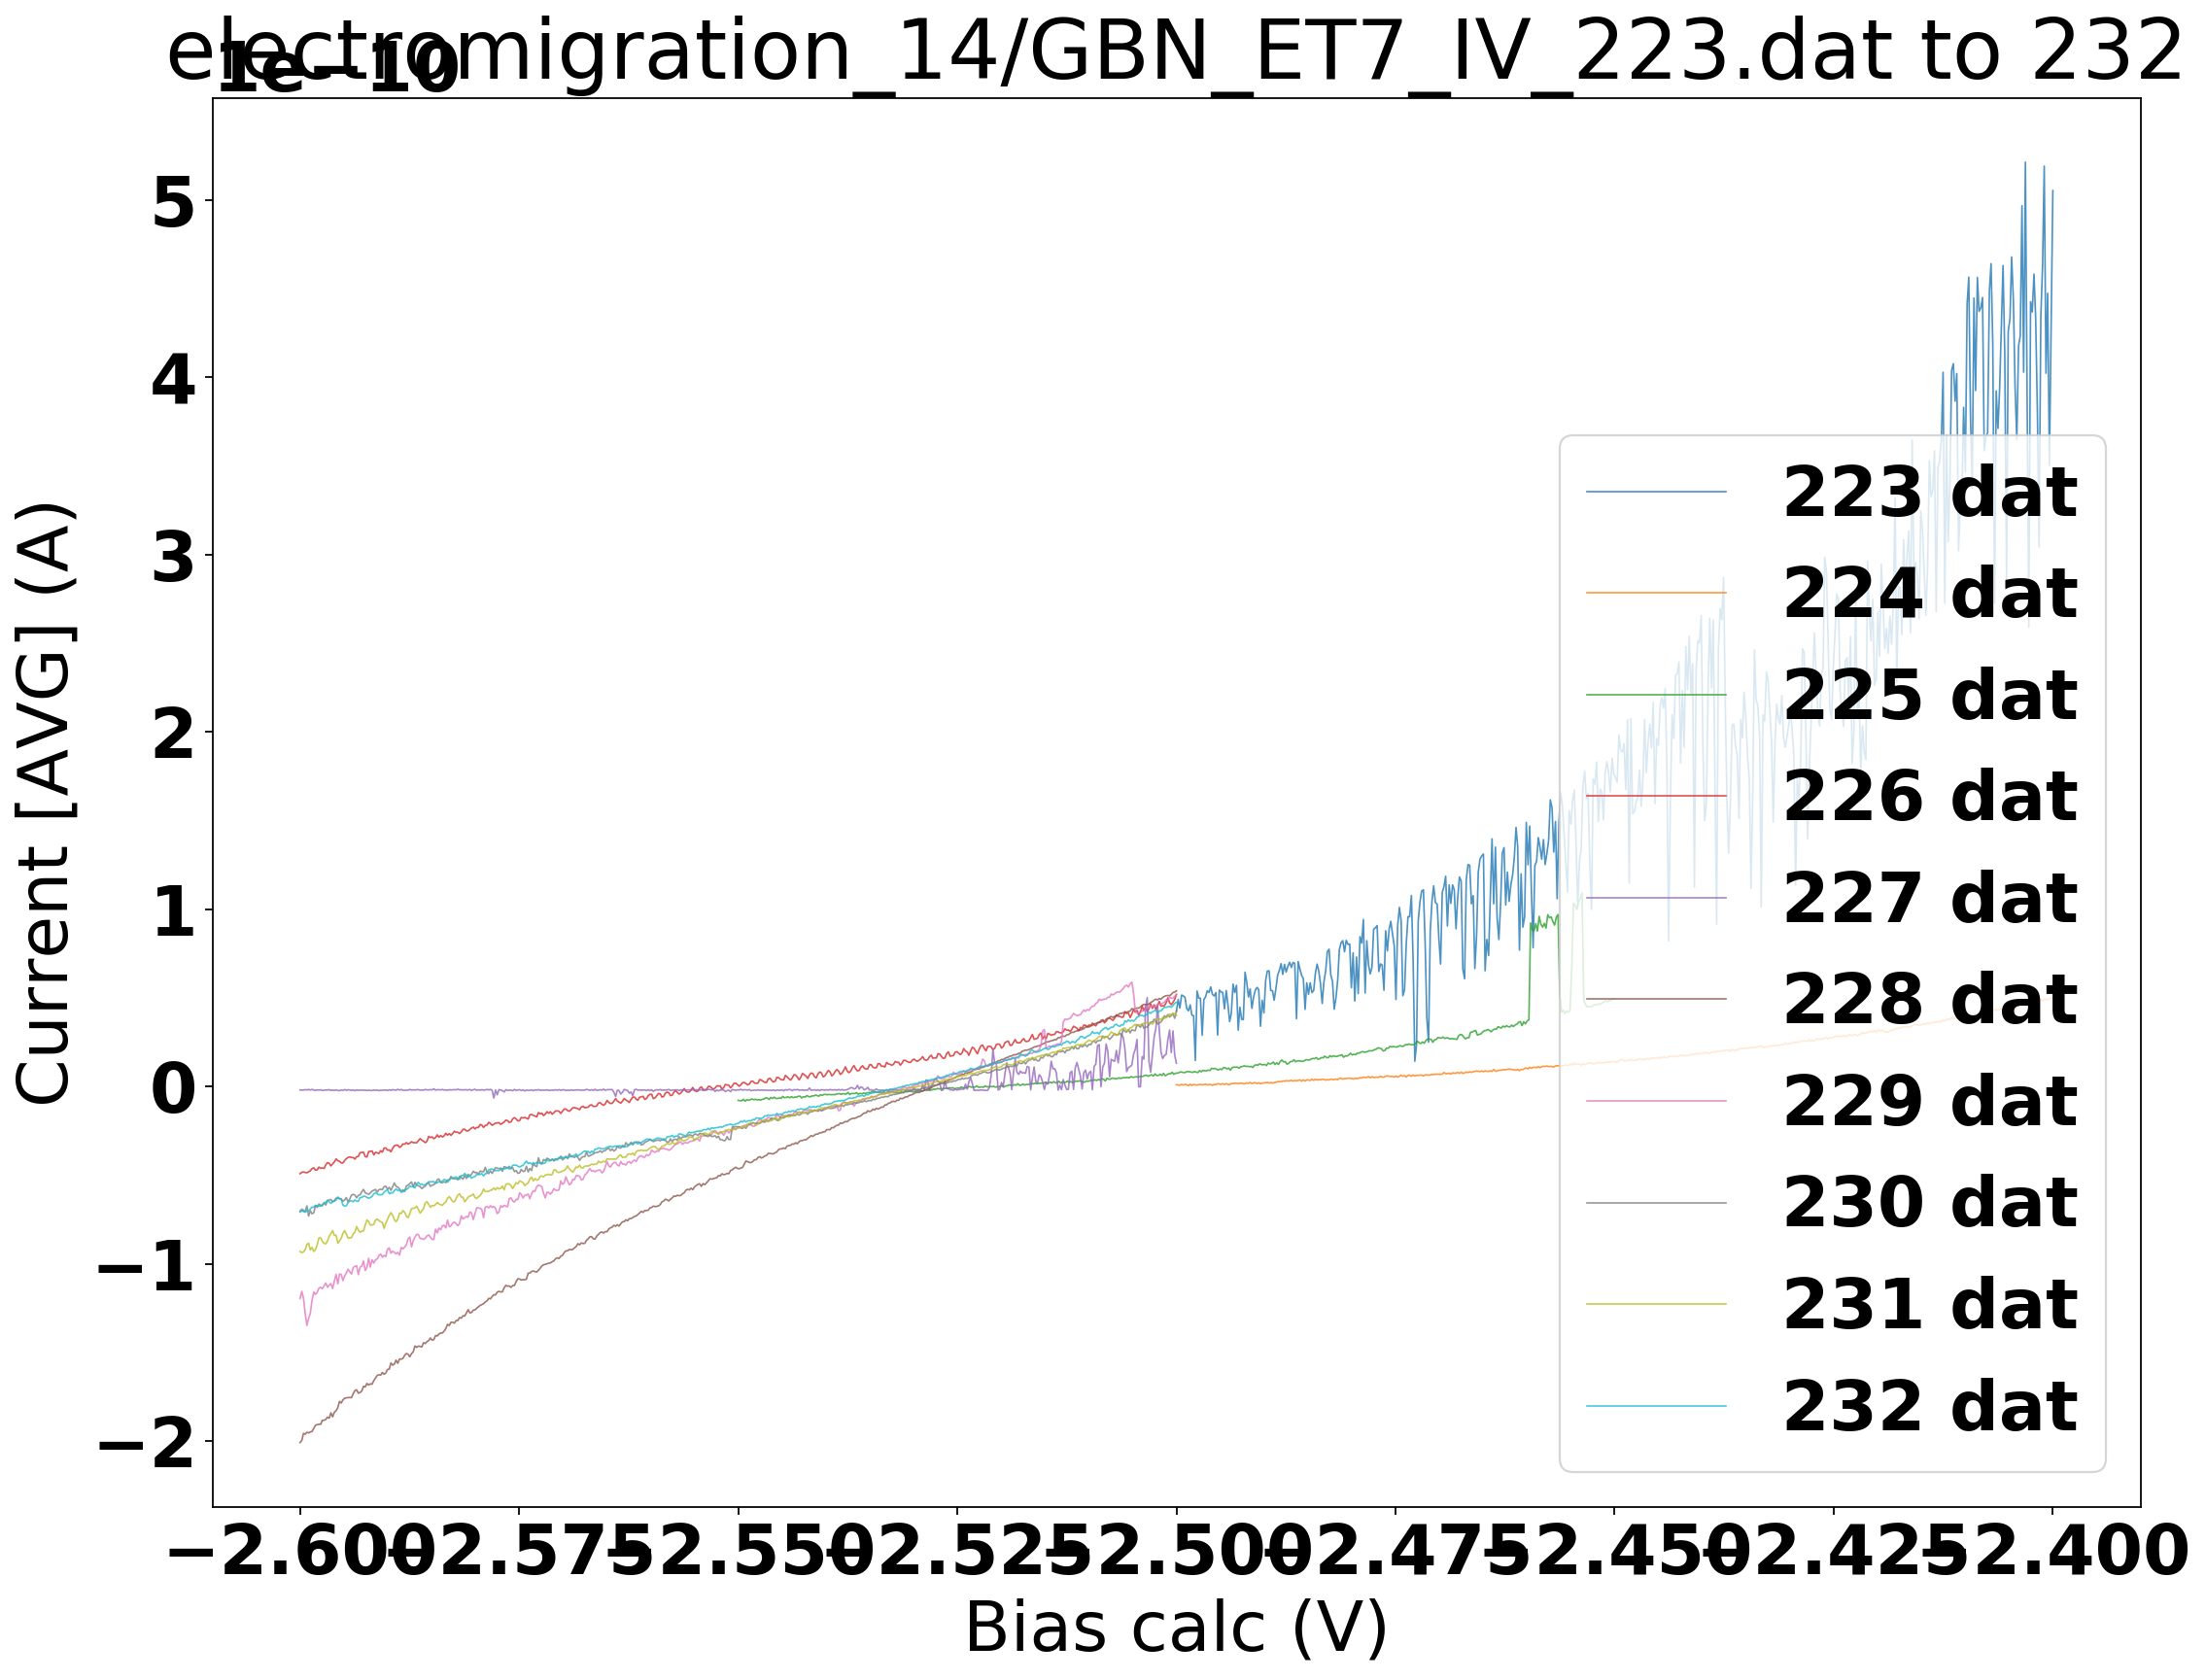

In [563]:
import math
import warnings
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")
fig = plt.figure(num=None, figsize=(16, 12), dpi=160)
ax = fig.add_subplot(111)
plt.title(PATH + str(N_RANGE[0]) + ".dat to " + str(N_RANGE[1] - 1))
j = 0
crossing_voltage = []
position = []
col = plt.cm.jet(np.linspace(0, 1, 101)) 
for file, height in zip(files, heights):
    with open(file,'r') as f:
        while f.readline() != '[DATA]\n': # 70 for .dat, 8 for transport__.dat
            continue
        df = pd.read_table(f)
        df = df.astype('float64')
        ax = sns.lineplot('Bias calc (V)', 'Current [AVG] (A)', data=df, lw=0.75, label=names[j], ax=ax, alpha=0.8)
        df['Current [AVG] (A)'] = savgol_filter(df['Current [AVG] (A)'], 101, 3)
        crossings = df['Current [AVG] (A)'].apply(np.sign).diff()
        if len(df[(crossings == 2) | (crossings == -2)].dropna()['Bias calc (V)'].values) > 0:
            crossing_voltage.append(df[(crossings == 2) | (crossings == -2)].dropna()['Bias calc (V)'].values[0])
            position.append(j)
        j += 1
        

In [568]:
position

[2, 3, 4, 5, 6, 7, 8, 9]

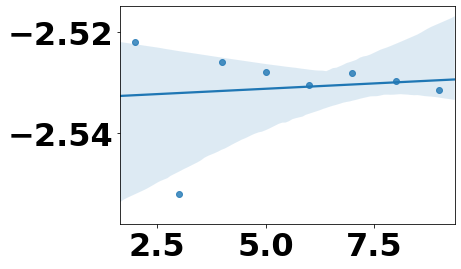

In [569]:
from scipy.stats import linregress
sns.regplot(np.arange(2, 10, 1), crossing_voltage)

In [574]:
len(np.arange(2, 10, 1))

8

In [570]:
slope, _, _, _, std_err = linregress(np.arange(2, 10, 1) * 10, crossing_voltage)
slopes.append(slope)
stds.append(std_err)

Text(0, 0.5, 'Electric field (mV/micron)')

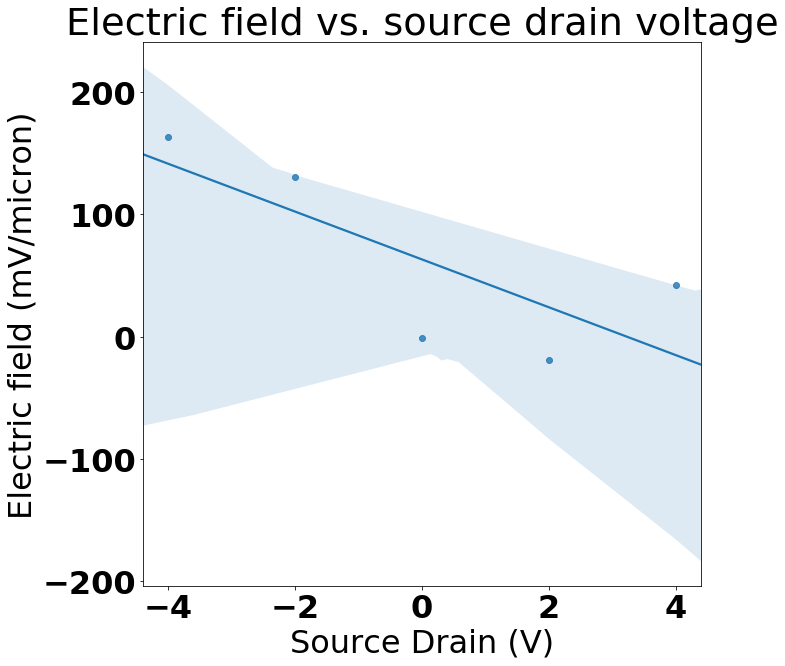

In [575]:
plt.figure(figsize=(10, 10))
sns.regplot(volts, np.array(slopes)*1e6) 
plt.title('Electric field vs. source drain voltage')
plt.xlabel('Source Drain (V)')
plt.ylabel('Electric field (mV/micron)')

Text(0, 0.5, 'Standard Deviation in Crossing Bias')

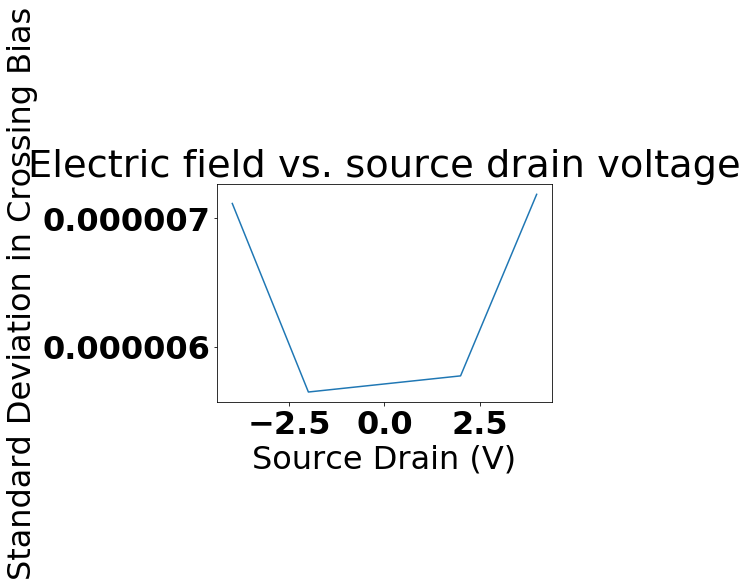

In [325]:
plt.plot([4, 2, -2, -4], stds)
plt.title('Electric field vs. source drain voltage')
plt.xlabel('Source Drain (V)')
plt.ylabel('Standard Deviation in Crossing Bias')